<a href="https://colab.research.google.com/github/h-amirali87/projects1/blob/main/Amirali11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#وارد کردن دیتاست
from google .colab import files
uploaded=files.upload()

Saving df.csv to df.csv


In [ ]:
#وارد کردن کتابخانه هایی که بهشون نیاز داریم
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [ ]:
#خواندن دیتامون
df_raw = pd.read_csv('df.csv')

#Data Understanding


In [ ]:
df_raw.head()

Job Title               Salary Estimate  Rating  \
0              Senior Data Scientist  $111K-$181K (Glassdoor est.)     3.5   
1  Data Scientist, Product Analytics  $111K-$181K (Glassdoor est.)     4.5   
2               Data Science Manager  $111K-$181K (Glassdoor est.)    -1.0   
3                       Data Analyst  $111K-$181K (Glassdoor est.)     3.4   
4             Director, Data Science  $111K-$181K (Glassdoor est.)     3.4   

                      Company Name       Location                    Size  \
0                      Hopper\n3.5   New York, NY   501 to 1000 employees   
1                     Noom US\n4.5   New York, NY  1001 to 5000 employees   
2                         Decode_M   New York, NY       1 to 50 employees   
3            Sapphire Digital\n3.4  Lyndhurst, NJ    201 to 500 employees   
4  United Entertainment Group\n3.4   New York, NY     51 to 200 employees   

  Founded  Type of ownership                   Industry  \
0    2007  Company - Private            Travel Agencies   
1    2008  Company - Private  Health, Beauty, & Fitness   
2      -1            Unknown                         -1   
3    2019  Company - Private                   Internet   
4    2007  Company - Private    Advertising & Marketing   

                   Sector                   Revenue  
0        Travel & Tourism  Unknown / Non-Applicable  
1       Consumer Services  Unknown / Non-Applicable  
2                      -1  Unknown / Non-Applicable  
3  Information Technology  Unknown / Non-Applicable  
4       Business Services  Unknown / Non-Applicable

In [ ]:
#اطلاعات دیتامون
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [ ]:
#تعداد سطرها و ستون های دیتامون
df_raw.shape

(5892, 11)

In [ ]:
# salary estimatesحذف کردن عدد"1-"درستون
df = df_raw[df_raw['Salary Estimate'] != '-1']
#salary estimatesدر ستون 'per hour'حذف کردن
df = df[~df['Salary Estimate'].str.contains('Per Hour')]
#salary estimatesحذف کردن "$"در ستون
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$', ' '))
#salary estimatesحذف کردن "K"در ستون
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K', ' '))
#salary estimatesاز هم جداکردن داده های ستون
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split())
#  برای جدا کردن بیشترین و کمترین حقوق'Max_salary'و'Min_salary'ساخت دو ستون
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[2])
#تبدیل کردن این دوتا ستون یه عدد صیحیح
df['Min_salary'] = df['Min_salary'].apply(lambda x:int(x))
df['Max_salary']=df['Max_salary'].astype(int)
#'Average_salary'میانگین گرفتن این دوتا ستون و ساخت ستون
df['Average_salary'] = (df.Min_salary + df.Max_salary)/2
#'State'و گرفتن ایالت های انها  و قرار دادن ان در ستون'Location'از هم جدا کردن ستون
df['State'] = df['Location'].apply(lambda x: x.split()[-1])
#'Kingdom'حذف ایالت
df = df[df.State != 'Kingdom']
#این تابع عنوان شغل ها رو سازماندهی میکند
def title_organizer(x):
        x = x.lower()
        if ('data scientist' in x) or ('data science' in x) :
            return 'data scientist'
        elif 'data engineer' in x:
            return 'data engineer'
        elif 'deep learning' in x:
            return 'deep learning engineer'
        elif 'machine learning' in x:
            return 'machine learning engineer'
        elif 'director' in x:
            return 'director'
        elif 'manager' in x:
            return 'manager'
        elif 'analyst' in x:
            return 'analyst'
        elif 'researcher' in x:
            return 'researcher'
        else:
            return 'other'


In [ ]:
df['Job Title'] = df['Job Title'].apply(title_organizer)
#Ratingحذف کردن عدد"1-"درستون
df = df[df['Rating']!=-1]
cleaned_df = df[['Job Title', 'Rating', 'Average_salary', 'State']]
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


<ipython-input-8-e008987d8ac2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = df['Job Title'].apply(title_organizer)


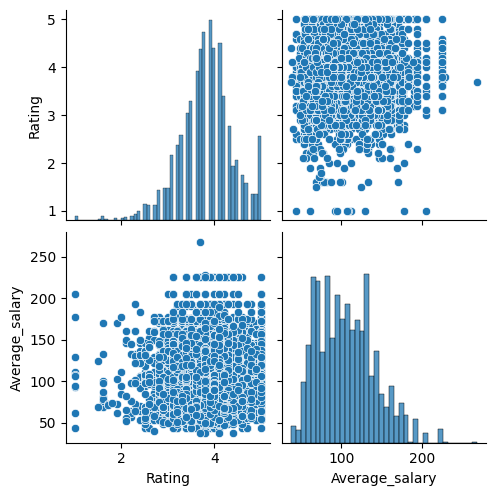

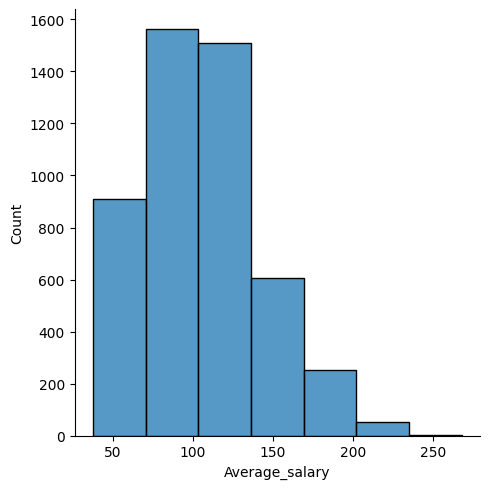

In [ ]:
sns.pairplot(cleaned_df)
sns.displot(x='Average_salary', data= cleaned_df, bins = 7)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'data scientist'),
  Text(1, 0, 'analyst'),
  Text(2, 0, 'researcher'),
  Text(3, 0, 'other'),
  Text(4, 0, 'data engineer'),
  Text(5, 0, 'manager'),
  Text(6, 0, 'machine learning engineer'),
  Text(7, 0, 'director'),
  Text(8, 0, 'deep learning engineer')])

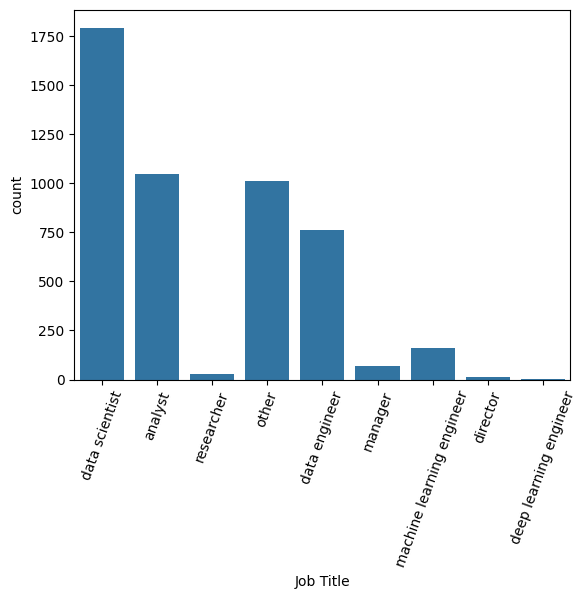

In [ ]:
sns.countplot(x='Job Title', data= cleaned_df)
plt.xticks(rotation= 70)

<Axes: xlabel='Rating', ylabel='Average_salary'>

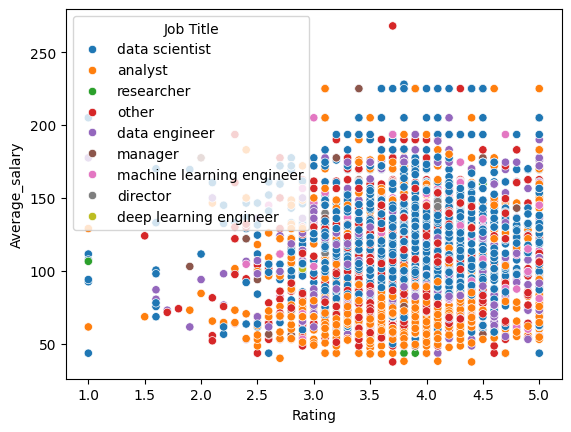

In [ ]:
sns.scatterplot(x='Rating', y='Average_salary', data= cleaned_df, hue='Job Title')

#Faeture Engineering

In [ ]:
preprocessed_df = pd.get_dummies(cleaned_df, columns=['Job Title','State'])
X = preprocessed_df.drop(columns='Average_salary')
y = preprocessed_df['Average_salary']

#Modeling

3058646663289845.5
[ 2.24685151e+00 -2.49466685e+15 -2.49466685e+15 -2.49466685e+15
 -2.49466685e+15 -2.49466685e+15 -2.49466685e+15 -2.49466685e+15
 -2.49466685e+15 -2.49466685e+15 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14]


<Axes: xlabel='Average_salary'>

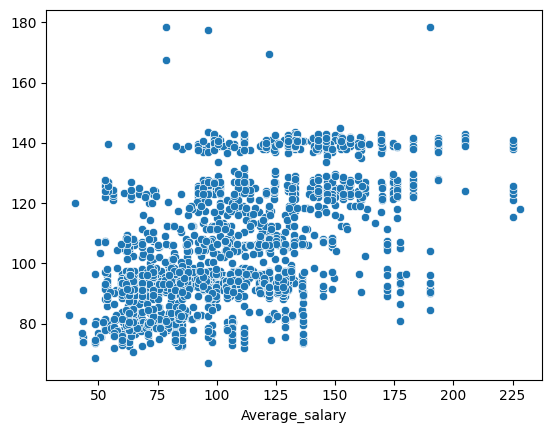

In [ ]:
# برای سنجیدن دقت پیش بینی استفاده میکنیمtest برای اموزش دادن مدل ماشین لرنینیگمون و trainتقسیم کردیم و از دسته trainوtestدیتامون رو به دو دسته
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 101)
ir = LinearRegression()
ir.fit(X_train,y_train)
print(ir.intercept_)
print(ir.coef_)
len(ir.coef_)
predictions = ir.predict(X_test)
predictions
sns.scatterplot(x=y_test, y=predictions)


<ipython-input-14-8c199295049e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=45)


<Axes: xlabel='Average_salary', ylabel='Density'>

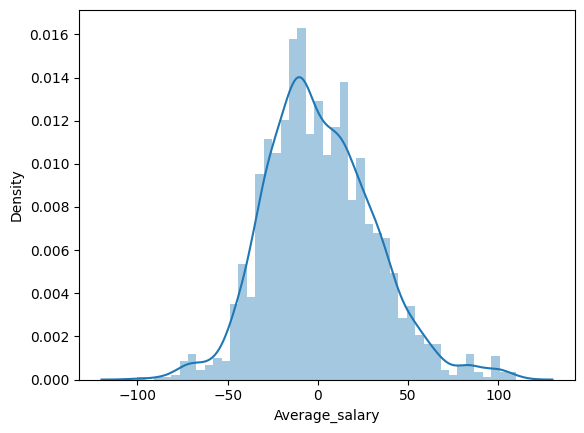

In [ ]:
residual= y_test-predictions
sns.distplot(residual,bins=45)

In [ ]:
print('MAE:', mean_absolute_error(y_test, predictions))

MAE: 23.80148185998978


#Feature Engineering

In [ ]:
preprocessed_df['Average_salary'].median()
preprocessed_df['Satisfaction'] = preprocessed_df['Average_salary'].apply(lambda x: 1 if x >= 102 else 0)
X = preprocessed_df.drop(columns=['Average_salary', 'Satisfaction'])
y = preprocessed_df['Satisfaction']

#Modeling


#Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
prediction_logreg = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
confusion_matrix(y_test,prediction_logreg)

array([[518, 204],
       [230, 516]])

In [ ]:
print(classification_report(y_test,prediction_logreg))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       722
           1       0.72      0.69      0.70       746

    accuracy                           0.70      1468
   macro avg       0.70      0.70      0.70      1468
weighted avg       0.70      0.70      0.70      1468



In [ ]:
accuracy_score(y_test, prediction_logreg)

0.7043596730245232

#K Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
prediction_knn = knn.predict(X_test)
accuracy_score(y_test, prediction_knn)

0.6525885558583107

In [ ]:
confusion_matrix(y_test, prediction_knn)

array([[462, 260],
       [250, 496]])

In [ ]:
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       722
           1       0.66      0.66      0.66       746

    accuracy                           0.65      1468
   macro avg       0.65      0.65      0.65      1468
weighted avg       0.65      0.65      0.65      1468



# Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train , y_train)
predict_tree = tree.predict(X_test)
confusion_matrix(y_test,predict_tree)

array([[506, 216],
       [282, 464]])

In [ ]:
accuracy_score(y_test,predict_tree)

0.6607629427792916

In [ ]:
print(classification_report(y_test,predict_tree))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       722
           1       0.68      0.62      0.65       746

    accuracy                           0.66      1468
   macro avg       0.66      0.66      0.66      1468
weighted avg       0.66      0.66      0.66      1468



# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict_rf = rf.predict(X_test)
confusion_matrix(y_test, predict_rf)

array([[462, 260],
       [245, 501]])

In [ ]:
accuracy_score(y_test, predict_rf)

0.6559945504087193

In [ ]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       722
           1       0.66      0.67      0.66       746

    accuracy                           0.66      1468
   macro avg       0.66      0.66      0.66      1468
weighted avg       0.66      0.66      0.66      1468

